In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
from autoencoder import autoencoder
from keras.callbacks import ModelCheckpoint
from keras.layers.convolutional import Conv1D, MaxPooling1D
from keras.layers import AveragePooling1D, Activation, Flatten, Dense
from keras.layers import GlobalMaxPooling1D, Dropout
from keras.layers import GlobalAveragePooling1D, UpSampling1D
from keras.models import Model
from keras.regularizers import l2
from keras.optimizers import SGD, Adam, Nadam, Adamax
from keras.layers.normalization import BatchNormalization
import keras.backend as K
from data_in import data_in, normali
#from tqdm import tqdm
#from sklearn.model_selection import train_test_split

/Users/xufanxiong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
X_train, y_train = data_in()

In [3]:
#Nomalization
y_train = (y_train-50)/150
X_train = normali(X_train)
print('Shape of X_train is: ' + str(X_train.shape))
print('Shape of y_train is: ' + str(y_train.shape))

Shape of X_train is: (1768, 1000, 5)
Shape of y_train is: (1768, 1)


In [4]:
X_train_PPG = X_train[:, :, :2]
X_train_acc = X_train[:, :, 2:]

Heart rate is: [79.5990566]


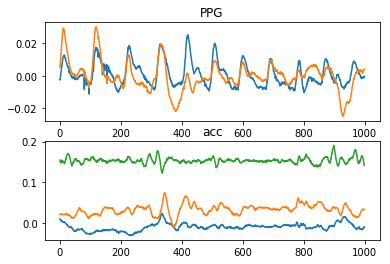

In [5]:
num_in = 10
print('Heart rate is: ' + str(y_train[num_in]*150+50))
plt.subplot(211)
plt.plot(X_train_PPG[num_in, :, :])
plt.title('PPG')
plt.subplot(212)
plt.plot(X_train_acc[num_in, :, :])
plt.title('acc')
plt.show()

In [6]:
#Add Gaussian Noise
sigma = 0.0005
mu = 0
noise = np.random.randn(X_train.shape[0], X_train.shape[1], X_train.shape[2])*sigma + mu
noise[:, :, 2:] = 0
X_train_noise = X_train + noise
X_train_noise = X_train_noise / (X_train_noise.max() - X_train_noise.min())

Heart rate is: [79.5990566]


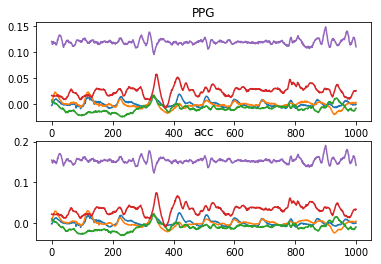

In [7]:
num_in = 10
print('Heart rate is: ' + str(y_train[num_in]*150+50))
plt.subplot(211)
plt.plot(X_train_noise[num_in, :, :])
plt.title('PPG')
plt.subplot(212)
plt.plot(X_train[num_in, :, :])
plt.title('acc')
plt.show()

In [8]:
aemodel = autoencoder((1000, 5))

In [12]:
optm = Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=3*10**(-4))
aemodel.compile(loss= "mse", 
              optimizer=optm, 
              metrics=["mse"])

In [13]:
filepath="weight_troika.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_mean_squared_error', 
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]
history = aemodel.fit(X_train_noise, X_train, 
                    epochs=200, 
                    batch_size=128, 
                    validation_split=0.2, 
                    callbacks=callbacks_list,
                    shuffle=True,
                    verbose=1)

Train on 1414 samples, validate on 354 samples
Epoch 1/200
1414/1414 [==============================] - 8s 5ms/step - loss: 0.0516 - mean_squared_error: 0.0094 - val_loss: 0.0541 - val_mean_squared_error: 0.0122

Epoch 00001: val_mean_squared_error improved from inf to 0.01218, saving model to weight_troika.hdf5
Epoch 2/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0508 - mean_squared_error: 0.0092 - val_loss: 0.0531 - val_mean_squared_error: 0.0121

Epoch 00002: val_mean_squared_error improved from 0.01218 to 0.01209, saving model to weight_troika.hdf5
Epoch 3/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0497 - mean_squared_error: 0.0091 - val_loss: 0.0520 - val_mean_squared_error: 0.0121

Epoch 00003: val_mean_squared_error did not improve from 0.01209
Epoch 4/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0484 - mean_squared_error: 0.0090 - val_loss: 0.0507 - val_mean_squared_error: 0.0121

Epoch 00004: val_m


Epoch 00033: val_mean_squared_error did not improve from 0.00617
Epoch 34/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0096 - mean_squared_error: 0.0035 - val_loss: 0.0129 - val_mean_squared_error: 0.0070

Epoch 00034: val_mean_squared_error did not improve from 0.00617
Epoch 35/200
1414/1414 [==============================] - 5s 3ms/step - loss: 0.0092 - mean_squared_error: 0.0035 - val_loss: 0.0112 - val_mean_squared_error: 0.0058

Epoch 00035: val_mean_squared_error improved from 0.00617 to 0.00576, saving model to weight_troika.hdf5
Epoch 36/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0088 - mean_squared_error: 0.0035 - val_loss: 0.0113 - val_mean_squared_error: 0.0062

Epoch 00036: val_mean_squared_error did not improve from 0.00576
Epoch 37/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0084 - mean_squared_error: 0.0035 - val_loss: 0.0114 - val_mean_squared_error: 0.0066

Epoch 00037: val_mean_squared_e


Epoch 00068: val_mean_squared_error did not improve from 0.00550
Epoch 69/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0046 - mean_squared_error: 0.0030 - val_loss: 0.0074 - val_mean_squared_error: 0.0058

Epoch 00069: val_mean_squared_error did not improve from 0.00550
Epoch 70/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0046 - mean_squared_error: 0.0030 - val_loss: 0.0096 - val_mean_squared_error: 0.0081

Epoch 00070: val_mean_squared_error did not improve from 0.00550
Epoch 71/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0046 - mean_squared_error: 0.0030 - val_loss: 0.0088 - val_mean_squared_error: 0.0073

Epoch 00071: val_mean_squared_error did not improve from 0.00550
Epoch 72/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0046 - mean_squared_error: 0.0030 - val_loss: 0.0091 - val_mean_squared_error: 0.0075

Epoch 00072: val_mean_squared_error did not improve from 0.00550
Epoch 

1414/1414 [==============================] - 4s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0028 - val_loss: 0.0085 - val_mean_squared_error: 0.0070

Epoch 00104: val_mean_squared_error did not improve from 0.00550
Epoch 105/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0028 - val_loss: 0.0073 - val_mean_squared_error: 0.0058

Epoch 00105: val_mean_squared_error did not improve from 0.00550
Epoch 106/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0044 - mean_squared_error: 0.0029 - val_loss: 0.0083 - val_mean_squared_error: 0.0068

Epoch 00106: val_mean_squared_error did not improve from 0.00550
Epoch 107/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0028 - val_loss: 0.0072 - val_mean_squared_error: 0.0057

Epoch 00107: val_mean_squared_error did not improve from 0.00550
Epoch 108/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0

1414/1414 [==============================] - 4s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0028 - val_loss: 0.0088 - val_mean_squared_error: 0.0073

Epoch 00139: val_mean_squared_error did not improve from 0.00540
Epoch 140/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0044 - mean_squared_error: 0.0029 - val_loss: 0.0093 - val_mean_squared_error: 0.0078

Epoch 00140: val_mean_squared_error did not improve from 0.00540
Epoch 141/200
1414/1414 [==============================] - 5s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0029 - val_loss: 0.0081 - val_mean_squared_error: 0.0066

Epoch 00141: val_mean_squared_error did not improve from 0.00540
Epoch 142/200
1414/1414 [==============================] - 5s 4ms/step - loss: 0.0043 - mean_squared_error: 0.0028 - val_loss: 0.0085 - val_mean_squared_error: 0.0071

Epoch 00142: val_mean_squared_error did not improve from 0.00540
Epoch 143/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0

1414/1414 [==============================] - 4s 3ms/step - loss: 0.0045 - mean_squared_error: 0.0030 - val_loss: 0.0075 - val_mean_squared_error: 0.0060

Epoch 00174: val_mean_squared_error did not improve from 0.00540
Epoch 175/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0044 - mean_squared_error: 0.0029 - val_loss: 0.0086 - val_mean_squared_error: 0.0071

Epoch 00175: val_mean_squared_error did not improve from 0.00540
Epoch 176/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0028 - val_loss: 0.0081 - val_mean_squared_error: 0.0066

Epoch 00176: val_mean_squared_error did not improve from 0.00540
Epoch 177/200
1414/1414 [==============================] - 4s 3ms/step - loss: 0.0043 - mean_squared_error: 0.0028 - val_loss: 0.0082 - val_mean_squared_error: 0.0067

Epoch 00177: val_mean_squared_error did not improve from 0.00540
Epoch 178/200
1414/1414 [==============================] - 5s 3ms/step - loss: 0.0

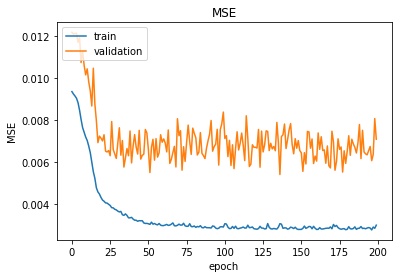

In [14]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

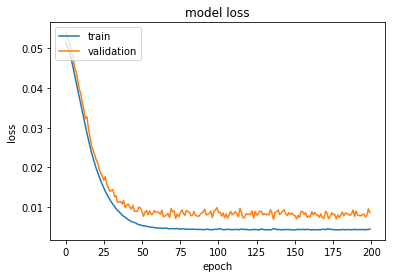

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
filepath="weight_troika.hdf5"
aemodel.load_weights(filepath)

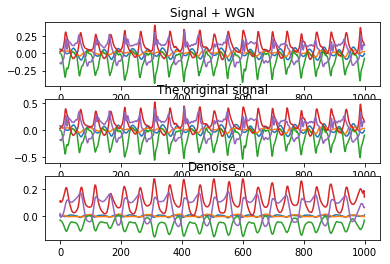

In [23]:
#Predict test set
predict_num = 1000
X_predict = X_train_noise[predict_num, :, :]
predict_res = aemodel.predict(np.expand_dims(X_predict, axis=0))

plt.subplot(3, 1, 1)
plt.plot(range(1000), X_train_noise[predict_num])
plt.title('Signal + WGN')
plt.subplot(3, 1, 2)
plt.plot(range(1000), X_train[predict_num])
plt.title('The original signal')
plt.subplot(3, 1, 3)
plt.plot(range(1000), predict_res[0])
plt.title('Denoise')
plt.show()

In [24]:
aemodel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1000, 5)           0         
_________________________________________________________________
activation_1 (Activation)    (None, 1000, 5)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 1000, 16)          336       
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000, 16)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 500, 16)           0         
_________________________________________________________________
activation_2 (Activation)    (None, 500, 16)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 500, 32)           2080      
__________

In [28]:
dropout_rate = 0.2
layer_out = aemodel.layers[16].output

if K.image_dim_ordering() == 'channels_first':
	add_axis = 1
else:
	add_axis = -1
    
weight_decay = 1e-4

newlayer = BatchNormalization(axis=add_axis, 
                              gamma_regularizer=l2(weight_decay),
                             beta_regularizer=l2(weight_decay))(layer_out)
newlayer = Activation('relu')(newlayer)
newlayer = UpSampling1D(4)(layer_out)
newlayer = Conv1D(64, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(newlayer)
newlayer = Dropout(dropout_rate)(newlayer)
newlayer = MaxPooling1D(pool_size=2)(newlayer)
#newlayer = UpSampling1D(2)(newlayer)

newlayer = BatchNormalization(axis=add_axis, 
                              gamma_regularizer=l2(weight_decay),
                             beta_regularizer=l2(weight_decay))(newlayer)
newlayer = Activation('relu')(newlayer)
newlayer = Conv1D(256, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(newlayer)
newlayer = Dropout(dropout_rate)(newlayer)
newlayer = MaxPooling1D(pool_size=2)(newlayer)

newlayer = BatchNormalization(axis=add_axis, 
                              gamma_regularizer=l2(weight_decay),
                             beta_regularizer=l2(weight_decay))(newlayer)
newlayer = Activation('relu')(newlayer)
newlayer = Conv1D(128, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(newlayer)
newlayer = Dropout(dropout_rate)(newlayer)
newlayer = MaxPooling1D(pool_size=2)(newlayer)

newlayer = BatchNormalization(axis=add_axis, 
                              gamma_regularizer=l2(weight_decay),
                             beta_regularizer=l2(weight_decay))(newlayer)
newlayer = Activation('relu')(newlayer)
newlayer = Conv1D(64, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(newlayer)
newlayer = Dropout(dropout_rate)(newlayer)
newlayer = MaxPooling1D(pool_size=2)(newlayer)

newlayer = BatchNormalization(axis=add_axis, 
                              gamma_regularizer=l2(weight_decay),
                             beta_regularizer=l2(weight_decay))(newlayer)
newlayer = Activation('relu')(newlayer)
newlayer = Conv1D(16, 4, padding='same',
                    kernel_initializer='glorot_uniform',
                    kernel_regularizer=l2(1e-4))(newlayer)
newlayer = Dropout(dropout_rate)(newlayer)
#newlayer = GlobalAveragePooling1D()(newlayer)

newlayer = Flatten()(newlayer)
newlayer = Dense(64, activation='relu')(newlayer)
newlayer = Dropout(dropout_rate)(newlayer)
newlayer = Dense(16, activation='relu')(newlayer)
newlayer = Dropout(dropout_rate)(newlayer)

out = Dense(1, activation='sigmoid', 
               kernel_initializer='glorot_uniform')(newlayer)

finalmodel = Model(input=aemodel.input, output=out)

# Freeze the layers
for layer in finalmodel.layers[:10]:
    layer.trainable = False



/Users/xufanxiong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [29]:
optm = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=3*10**(-4))
finalmodel.compile(loss= "mse", 
              optimizer=optm, 
              metrics=["mse"])

In [31]:
filepath="weight_troika_final.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_mean_squared_error', 
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks_list = [checkpoint]
history = finalmodel.fit(X_train, y_train, 
                    epochs=100, 
                    batch_size=128, 
                    validation_split=0.2, 
                    callbacks=callbacks_list,
                    shuffle=True,
                    verbose=1)

Train on 1414 samples, validate on 354 samples
Epoch 1/100
1414/1414 [==============================] - 4s 2ms/step - loss: 0.1055 - mean_squared_error: 0.0161 - val_loss: 0.1373 - val_mean_squared_error: 0.0481

Epoch 00001: val_mean_squared_error improved from inf to 0.04810, saving model to weight_troika_final.hdf5
Epoch 2/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.1045 - mean_squared_error: 0.0154 - val_loss: 0.1348 - val_mean_squared_error: 0.0460

Epoch 00002: val_mean_squared_error improved from 0.04810 to 0.04604, saving model to weight_troika_final.hdf5
Epoch 3/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.1045 - mean_squared_error: 0.0159 - val_loss: 0.1354 - val_mean_squared_error: 0.0470

Epoch 00003: val_mean_squared_error did not improve from 0.04604
Epoch 4/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.1040 - mean_squared_error: 0.0158 - val_loss: 0.1343 - val_mean_squared_error: 0.0464

Epoch 

1414/1414 [==============================] - 4s 2ms/step - loss: 0.0874 - mean_squared_error: 0.0131 - val_loss: 0.1277 - val_mean_squared_error: 0.0537

Epoch 00035: val_mean_squared_error did not improve from 0.04344
Epoch 36/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.0872 - mean_squared_error: 0.0134 - val_loss: 0.1257 - val_mean_squared_error: 0.0521

Epoch 00036: val_mean_squared_error did not improve from 0.04344
Epoch 37/100
1414/1414 [==============================] - 4s 2ms/step - loss: 0.0865 - mean_squared_error: 0.0131 - val_loss: 0.1274 - val_mean_squared_error: 0.0543

Epoch 00037: val_mean_squared_error did not improve from 0.04344
Epoch 38/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.0860 - mean_squared_error: 0.0131 - val_loss: 0.1266 - val_mean_squared_error: 0.0539

Epoch 00038: val_mean_squared_error did not improve from 0.04344
Epoch 39/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.0853 

1414/1414 [==============================] - 3s 2ms/step - loss: 0.0685 - mean_squared_error: 0.0095 - val_loss: 0.1262 - val_mean_squared_error: 0.0675

Epoch 00070: val_mean_squared_error did not improve from 0.04344
Epoch 71/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.0687 - mean_squared_error: 0.0102 - val_loss: 0.1114 - val_mean_squared_error: 0.0531

Epoch 00071: val_mean_squared_error did not improve from 0.04344
Epoch 72/100
1414/1414 [==============================] - 4s 2ms/step - loss: 0.0681 - mean_squared_error: 0.0100 - val_loss: 0.1053 - val_mean_squared_error: 0.0474

Epoch 00072: val_mean_squared_error did not improve from 0.04344
Epoch 73/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.0670 - mean_squared_error: 0.0093 - val_loss: 0.1054 - val_mean_squared_error: 0.0479

Epoch 00073: val_mean_squared_error did not improve from 0.04344
Epoch 74/100
1414/1414 [==============================] - 3s 2ms/step - loss: 0.0670 

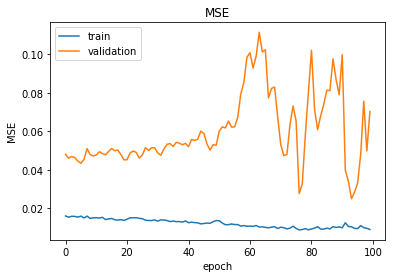

In [32]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

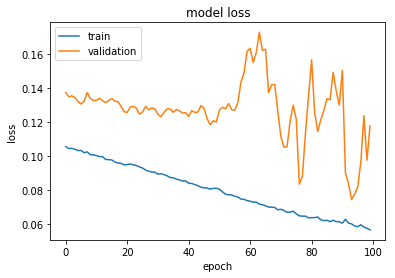

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [34]:
finalmodel.load_weights('weight_troika_final.hdf5')

In [35]:
#Evaluate
#eva = finalmodel.evaluate(X_test, Y_test, batch_size=32, verbose=1, sample_weight=None)
#print('loss = ' + str(eva[0]))
#print('Test MSE = ' + str(eva[1]))

In [36]:
#Import Test
X_test = sio.loadmat('TestData/Test_S01_T01.mat')
y_test = sio.loadmat('TrueBPM/True_S01_T01.mat')
X_test = X_test['sig'].T
y_test = y_test['BPM0']
print('The shape of X_test is: ' + str(X_test.shape))
print('The shape of y_test is: ' + str(y_test.shape))

The shape of X_test is: (36452, 5)
The shape of y_test is: (142, 1)


In [37]:
#Split data
tem = X_test
X_test = np.zeros((y_test.shape[0], 125*8, 5))
k = 0

for i in range(y_test.shape[0]):
    X_test[i, :, :] = tem[k:(k+125*8), :]
    k += 2*125
    
tem = 0
print('The shape of X_test is: ' + str(X_test.shape))

The shape of X_test is: (142, 1000, 5)


In [38]:
y_test = y_test/y_test.max()

In [40]:
predict = finalmodel.predict(X_test)

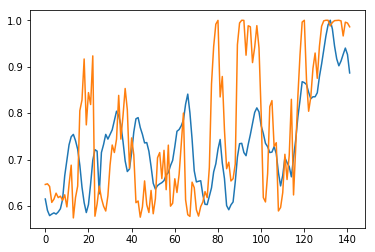

In [42]:
plt.plot(y_test)
plt.plot(predict)